In [191]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#학습용과 평가용 데이터 분리
from sklearn.model_selection import train_test_split

#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

#로지스틱 회귀
from statsmodels.api import Logit

#분류모델 평가 함수
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 나무 구조 시각화 및 의사결정나무
import graphviz 

from sklearn.tree import DecisionTreeClassifier, export_graphviz

# 랜덤 포레스트 분류
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# 분류 NN
from sklearn.neural_network import MLPClassifier

# SVM 
from sklearn.svm import SVC

import seaborn as sns

from sklearn.linear_model import LogisticRegression

# 서포트 벡터 머신

In [199]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/유방암.csv",encoding = 'euc-kr')
df_raw.head() # 데이터 불러오기

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [200]:
df_raw['diagnosis'] = df_raw['diagnosis'].replace('음성',0)
df_raw['diagnosis'] = df_raw['diagnosis'].replace('양성',1)
df_raw = pd.get_dummies(df_raw,drop_first = True)
df_raw.head() 
# diganosis 범주형 변수로 변환

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [201]:
df_raw.isnull().sum(axis = 0) # 결측치 이상 없음

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [202]:
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

display("설명변수:", df_raw_x.head())
display("목표변수:", df_raw_y.head())
# 설명변수와 목표변수로 데이터 나누기

'설명변수:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'목표변수:'

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [203]:
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns = v_feature_names)
display("Dummy 변환 전:", df_raw_x_num.head())
display("Dummy 변환 후:", df_x_scaled.head())
# 연속형 설명변수 scaling 변환

'Dummy 변환 전:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'Dummy 변환 후:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [262]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_scaled, df_raw_y, test_size = 0.4, random_state = 2023)

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)
# test와 train를 0.4:0.6 비율로 나눔

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터 : Train (192, 30)  Test (128, 30)


In [263]:
svm_uncustomized = SVC(random_state = 2023)
svm_uncustomized.fit(df_train_x,df_train_y)
print('Accuracy on training set: {:.3f}',format(svm_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on test set: {:.3f}',format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: {:.3f} 0.9895833333333334
Accuracy on test set: {:.3f} 0.9375


In [264]:
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 2023, True, 0.001, False])


In [265]:
train_accuracy = []; test_accuracy = []

para_c = [0.2 * c for c in range(1,15)]

for v_C in para_c:
    svm = SVC(C = v_C,random_state = 2023)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

df_accuracy_c.round(3)
# 1.8가 제일 큰 정확도를 띄고 있지만 전체적으로 test의 정확도가 낮다. 과대적합 의심

,C,TrainAccuracy,TestAccuracy
0,0.2,0.964,0.914
1,0.4,0.979,0.930
2,0.6,0.990,0.930
3,0.8,0.990,0.938
4,1.0,0.990,0.938
5,1.2,0.990,0.945
6,1.4,0.990,0.945
7,1.6,0.990,0.945
8,1.8,0.990,0.953
9,2.0,0.995,0.953


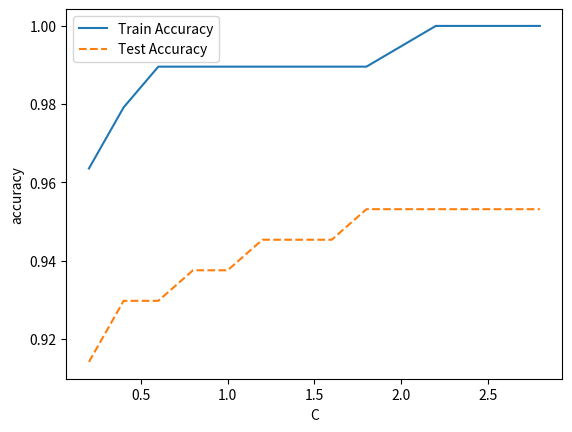

In [266]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

In [290]:
train_accuracy = []; test_accuracy = []

para_gamma = [0.0001 * gamma for gamma in range(1,20)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma,random_state = 2023)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

df_accuracy_gamma.round(4)
# gamma를 크게 해보니 변화량에서 너무 낮은 정확도를 관찰하였음. 그래서 소수점을 많이 두어 매우 작은 변화 영향을 확인하였다.

,gamma,TrainAccuracy,TestAccuracy
0,0.0001,0.9479,0.9219
1,0.0002,0.9531,0.8984
2,0.0003,0.9635,0.8984
3,0.0004,0.9635,0.8906
4,0.0005,0.9688,0.8906
5,0.0006,0.9688,0.8984
6,0.0007,0.9740,0.9219
7,0.0008,0.9740,0.9141
8,0.0009,0.9740,0.9141
9,0.0010,0.9792,0.8984


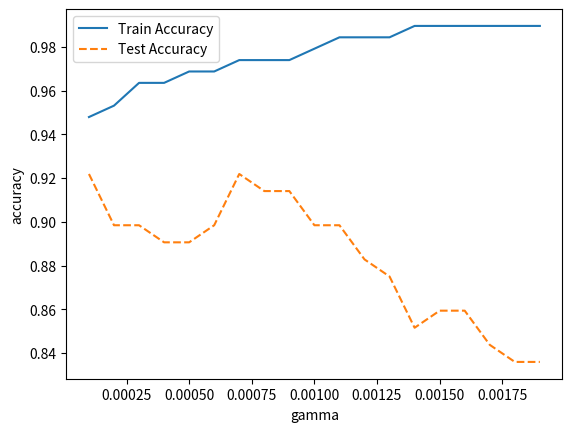

In [291]:
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

In [293]:
svc_final = SVC(gamma = 0.0007, C = 1.8, random_state = 2023)
svc_final.fit(df_train_x, df_train_y)
y_pred = svc_final.predict(df_test_x)
print("Accuracy on training set : {:.3f}". format(svc_final.score(df_test_x,df_test_y)))
print("Accuracy on test set : {:.3f}". format(svc_final.score(df_test_x,df_test_y)))
print("Confusion matrix :\n{}". format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits =3))
# train과 test 모두 정분류율이 0.891로 아쉬운 성능을 보여주긴 했음

Accuracy on training set : 0.891
Accuracy on test set : 0.891
Confusion matrix :
[[75  8]
 [ 6 39]]
              precision    recall  f1-score   support

           0      0.926     0.904     0.915        83
           1      0.830     0.867     0.848        45

    accuracy                          0.891       128
   macro avg      0.878     0.885     0.881       128
weighted avg      0.892     0.891     0.891       128



# 인공신경망

In [270]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/유방암.csv",encoding = 'euc-kr')
df_raw.head() # 데이터 불러오기

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [271]:
df_raw['diagnosis'] = df_raw['diagnosis'].replace('음성',0)
df_raw['diagnosis'] = df_raw['diagnosis'].replace('양성',1)

df_raw.head() 

# diganosis 범주형 변수를 이진변환

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [272]:
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

display("설명변수:", df_raw_x.head())
display("목표변수:", df_raw_y.head())

'설명변수:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'목표변수:'

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [273]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(\
  df_raw_x, df_raw_y, test_size = 0.4, random_state = 2023)

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)
# test와 train으로 나눔

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터 : Train (192, 30)  Test (128, 30)


In [274]:
nn_uncust = MLPClassifier(random_state = 1234)
nn_uncust.fit(df_train_x,df_train_y)
print('Accuracy on training set: {:.3f}',format(nn_uncust.score(df_train_x,df_train_y)))
print('Accuracy on test set: {:.3f}',format(nn_uncust.score(df_test_x,df_test_y)))

Accuracy on training set: {:.3f} 0.671875
Accuracy on test set: {:.3f} 0.6484375


In [275]:
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 2023, True, 0.001, False])


In [276]:
train_accuracy = []; test_accuracy = []
para_hidden = [1* hidden for hidden in range(1,21)]

print(para_hidden)


for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden),random_state = 2023)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)
# 히든 레이어같은 경우 많은 수를 두게 되면 모델이 과대적합이 나타나게 된다. 그렇기에 10개 정도는 적당하고 
# train과 test의 정확도 또한 괜찮기 때문에 10개를 선택

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-pac

,HiddenLayer,TrainAccuracy,TestAccuracy
0,1,0.328,0.352
1,2,0.672,0.648
2,3,0.859,0.891
3,4,0.672,0.648
4,5,0.849,0.844
5,6,0.328,0.352
6,7,0.672,0.648
7,8,0.927,0.875
8,9,0.672,0.648
9,10,0.932,0.883


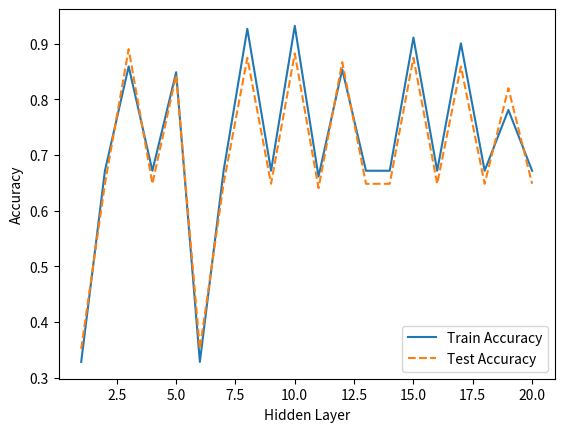

In [277]:
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

In [278]:
train_accuracy = []; test_accuracy = []
para_function = ["logistic", "tanh", "relu"]


for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,80),random_state = 2023)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivativeFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

df_accuracy_function.round(3)
# 활성화 함수 같은 경우 logistic이 test정확도가 제일 높아 logistic 함수를 선택하였음

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivativeFunction,TrainAccuracy,TestAccuracy
0,logistic,0.969,0.898
1,tanh,0.990,0.883
2,relu,0.859,0.844


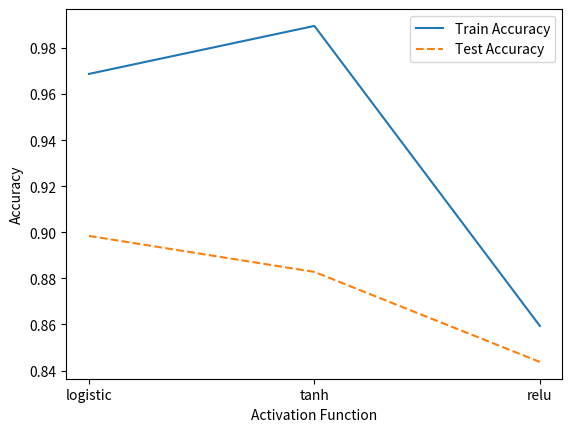

In [279]:
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Activation Function")
plt.legend()
#

In [280]:
train_accuracy = []; test_accuracy = []
para_solver = ["lbfgs", "sgd", "adam"]


for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "logistic", hidden_layer_sizes = (80,80),random_state = 2023)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

# 가중치 최적화 변경에 따른 모델의 성능을 확인하기 위해 solver 변경

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [281]:
df_accuracy_solver.round(3)
# solver 같은 경우 lbfgs가 3개 중에서 높은 정확도를 보여주고 있어서 lbfgs를 선택

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,0.948,0.898
1,sgd,0.672,0.648
2,adam,0.969,0.898


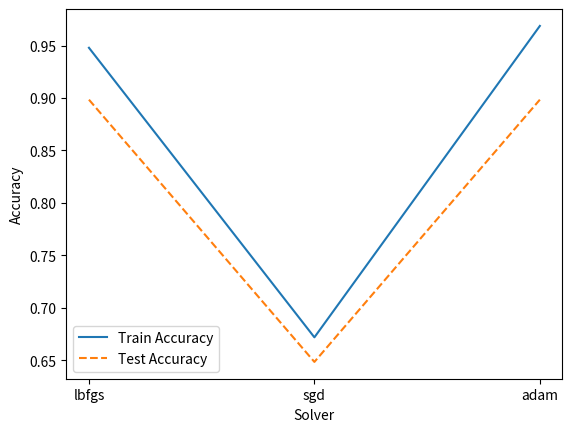

In [282]:
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Solver")
plt.legend()

In [283]:
train_accuracy = []; test_accuracy = []
para_batch = [20 * batch for batch in range(1,10)]

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(solver = "lbfgs",batch_size = v_batch, activation = "logistic", hidden_layer_sizes = (80,80),random_state = 2023)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

df_accuracy_batch.round(3)

[20, 40, 60, 80, 100, 120, 140, 160, 180]


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,0.948,0.898
1,40,0.948,0.898
2,60,0.948,0.898
3,80,0.948,0.898
4,100,0.948,0.898
5,120,0.948,0.898
6,140,0.948,0.898
7,160,0.948,0.898
8,180,0.948,0.898


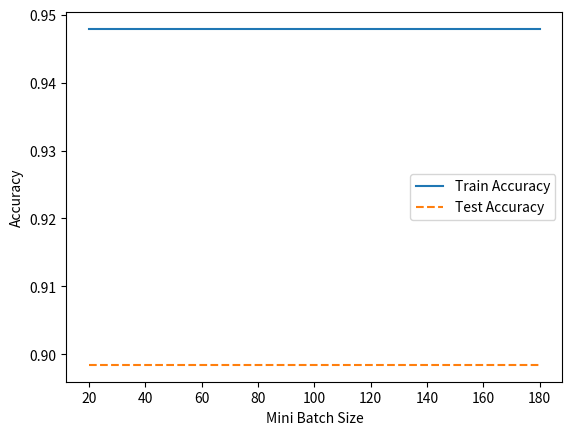

In [284]:
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()
# train모델과 test모델 같은 경우 배치 크기를 변경하여도 정확도가 바뀌지 않아서 지정하지 않음 

In [285]:
nn_final = MLPClassifier(solver = "lbfgs", activation = "logistic", hidden_layer_sizes = (80,80),random_state = 2023)
nn_final.fit(df_train_x, df_train_y)
y_pred = nn_final.predict(df_test_x)
print("Accuracy on training set : {:.3f}". format(nn_final.score(df_test_x,df_test_y)))
print("Accuracy on test set : {:.3f}". format(nn_final.score(df_test_x,df_test_y)))
print("Confusion matrix :\n{}". format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits =3))
# train과 test셋 같은 경우 0.898로 만족스러운 정확도는 보여주지 못하고 있음.
# 내가 모든 SVM과 인공 신경망 모델이 만족스러운 결과를 못내고 있음. 아쉽지만 더욱 정확도를 키울 수 있는 능력을 길러야겠다.

Accuracy on training set : 0.898
Accuracy on test set : 0.898
Confusion matrix :
[[76  7]
 [ 6 39]]
              precision    recall  f1-score   support

           0      0.927     0.916     0.921        83
           1      0.848     0.867     0.857        45

    accuracy                          0.898       128
   macro avg      0.887     0.891     0.889       128
weighted avg      0.899     0.898     0.899       128



/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
